In [ ]:
import ace_tools_open as tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import (generate_gaussian_A, 
                   generate_t_distribution_A, 
                   compute_matrices, 
                   compute_left_singular_vectors,
                   basic_matrix_multiplication,
                   compute_sampling_probabilities,
                   compute_sample_approximation_errors,
                   plot_probability_distribution,
                   plot_errors,
                   generate_random_projection_matrix
                   )

In [ ]:
n, d = 500, 50
seed = 1234  

A_GA = generate_gaussian_A(n, d, seed=seed)
A_T3 = generate_t_distribution_A(n, d, df=3, seed=seed)
A_T1 = generate_t_distribution_A(n, d, df=1, seed=seed)

U_A_GA = compute_left_singular_vectors(A_GA)
U_A_T3 = compute_left_singular_vectors(A_T3)
U_A_T1 = compute_left_singular_vectors(A_T1)

results_GA = compute_matrices(A_GA)
results_T3 = compute_matrices(A_T3)
results_T1 = compute_matrices(A_T1)

df_results = pd.DataFrame({
    "Dataset": ["GA", "T3", "T1"],
    "Frobenius Norm A^T A": [
        np.linalg.norm(results_GA[0], 'fro'),
        np.linalg.norm(results_T3[0], 'fro'),
        np.linalg.norm(results_T1[0], 'fro')
    ],
    "Frobenius Norm U_A^T U_A (SVD)": [
        np.linalg.norm(results_GA[1], 'fro'),
        np.linalg.norm(results_T3[1], 'fro'),
        np.linalg.norm(results_T1[1], 'fro')
    ],
    "Frobenius Norm U_A^T U_A (QR)": [
        np.linalg.norm(results_GA[2], 'fro'),
        np.linalg.norm(results_T3[2], 'fro'),
        np.linalg.norm(results_T1[2], 'fro')
    ]
})

tools.display_dataframe_to_user(name="Matrix Norm Comparisons", dataframe=df_results)

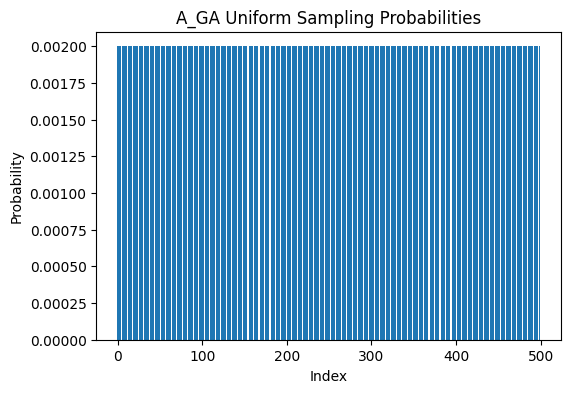

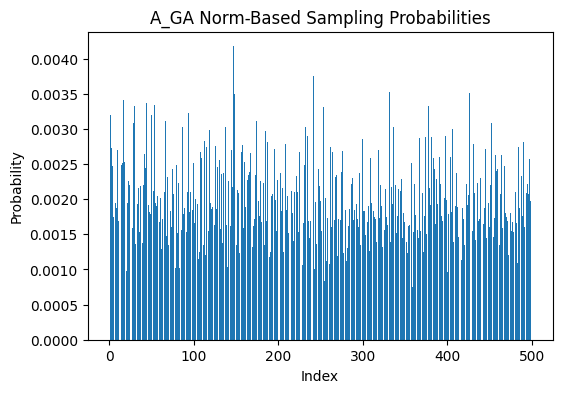

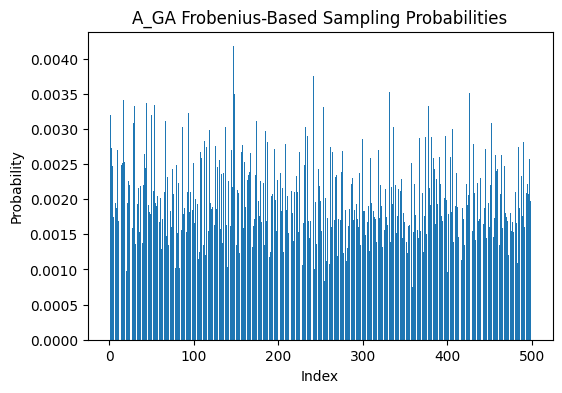

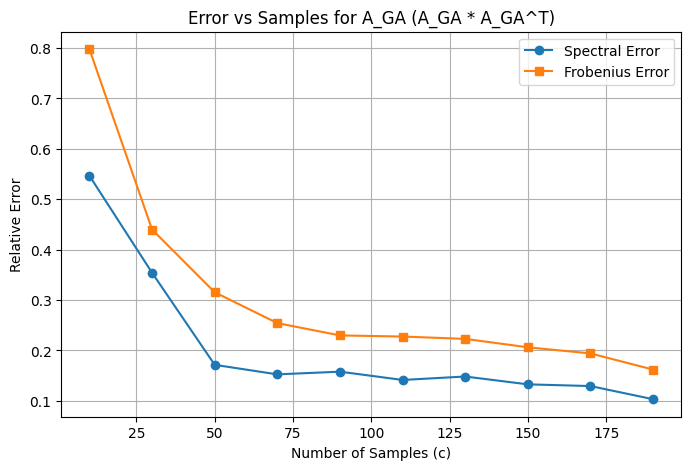

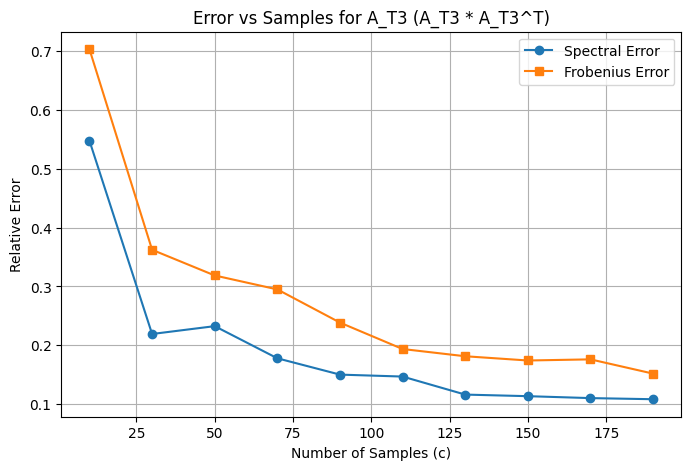

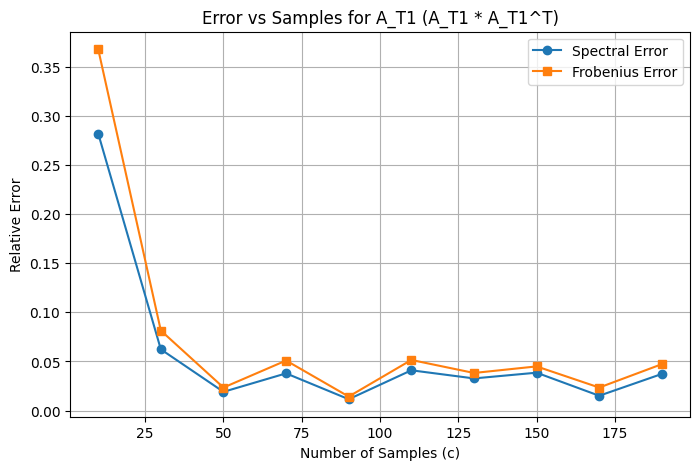

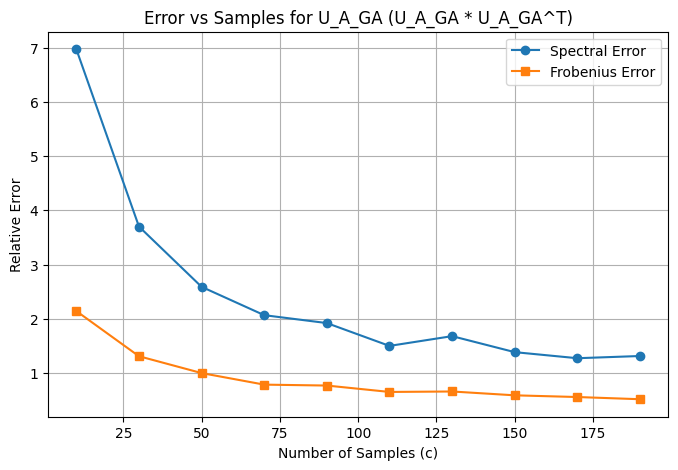

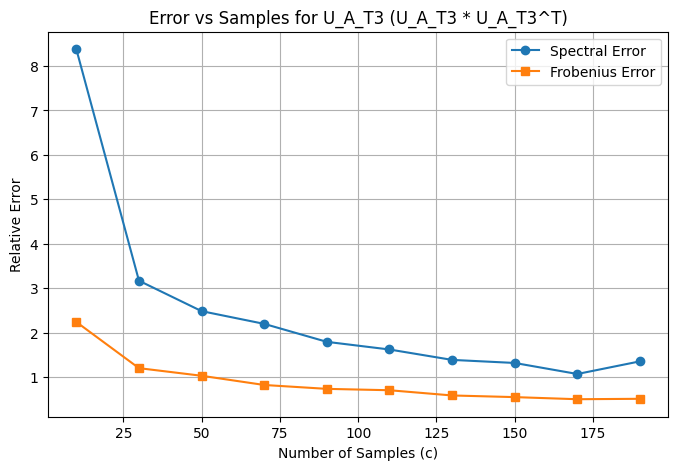

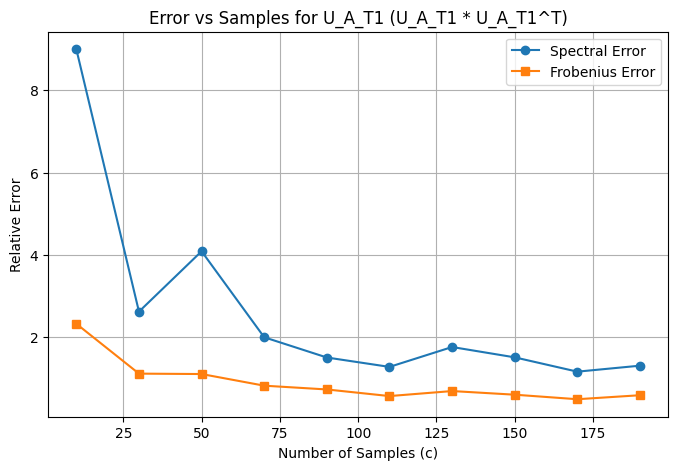

In [ ]:
A_GA_p_uniform   = compute_sampling_probabilities(A_GA.T, A_GA, method="uniform")
A_GA_p_norm_based = compute_sampling_probabilities(A_GA.T, A_GA, method="norm_based")
A_GA_p_frobenius = compute_sampling_probabilities(A_GA.T, A_GA, method="frobenius_based")
A_GA_p_leverage = compute_sampling_probabilities(A_GA.T, A_GA, method="leverage")
plot_probability_distribution(A_GA_p_uniform, "A_GA Uniform Sampling Probabilities")
plot_probability_distribution(A_GA_p_norm_based, "A_GA Norm-Based Sampling Probabilities")
plot_probability_distribution(A_GA_p_frobenius, "A_GA Frobenius-Based Sampling Probabilities")
plot_probability_distribution(A_GA_p_leverage, "A_GA Leverage Sampling Probabilities")
# Define a range of sample sizes (c-values) to test:
c_values = list(range(10, 210, 20)) 

# Compute and plot errors for A_GA approximating A_GA * A_GA^T using Frobenius-based probabilities:
spec_err_A_GA, fro_err_A_GA = compute_sample_approximation_errors(A_GA, A_GA_p_frobenius, c_values)
plot_errors(c_values, spec_err_A_GA, fro_err_A_GA, "Error vs Samples for A_GA (A_GA * A_GA^T)")

# Similarly, for T3 and T1 matrices:
A_T3_p_frobenius = compute_sampling_probabilities(A_T3.T, A_T3, method="frobenius_based")
spec_err_A_T3, fro_err_A_T3 = compute_sample_approximation_errors(A_T3, A_T3_p_frobenius, c_values)
plot_errors(c_values, spec_err_A_T3, fro_err_A_T3, "Error vs Samples for A_T3 (A_T3 * A_T3^T)")

A_T1_p_frobenius = compute_sampling_probabilities(A_T1.T, A_T1, method="frobenius_based")
spec_err_A_T1, fro_err_A_T1 = compute_sample_approximation_errors(A_T1, A_T1_p_frobenius, c_values)
plot_errors(c_values, spec_err_A_T1, fro_err_A_T1, "Error vs Samples for A_T1 (A_T1 * A_T1^T)")

# For the matrices of left singular vectors (U_A), note that U_A^T U_A is exactly I.
# Thus, the exact product is the identity matrix.
U_A_GA_p_frobenius = compute_sampling_probabilities(U_A_GA.T, U_A_GA, method="frobenius_based")
spec_err_U_A_GA, fro_err_U_A_GA = compute_sample_approximation_errors(U_A_GA, U_A_GA_p_frobenius, c_values)
plot_errors(c_values, spec_err_U_A_GA, fro_err_U_A_GA, "Error vs Samples for U_A_GA (U_A_GA * U_A_GA^T)")

U_A_T3_p_frobenius = compute_sampling_probabilities(U_A_T3.T, U_A_T3, method="frobenius_based")
spec_err_U_A_T3, fro_err_U_A_T3 = compute_sample_approximation_errors(U_A_T3, U_A_T3_p_frobenius, c_values)
plot_errors(c_values, spec_err_U_A_T3, fro_err_U_A_T3, "Error vs Samples for U_A_T3 (U_A_T3 * U_A_T3^T)")

U_A_T1_p_frobenius = compute_sampling_probabilities(U_A_T1.T, U_A_T1, method="frobenius_based") 
spec_err_U_A_T1, fro_err_U_A_T1 = compute_sample_approximation_errors(U_A_T1, U_A_T1_p_frobenius, c_values)
plot_errors(c_values, spec_err_U_A_T1, fro_err_U_A_T1, "Error vs Samples for U_A_T1 (U_A_T1 * U_A_T1^T)")

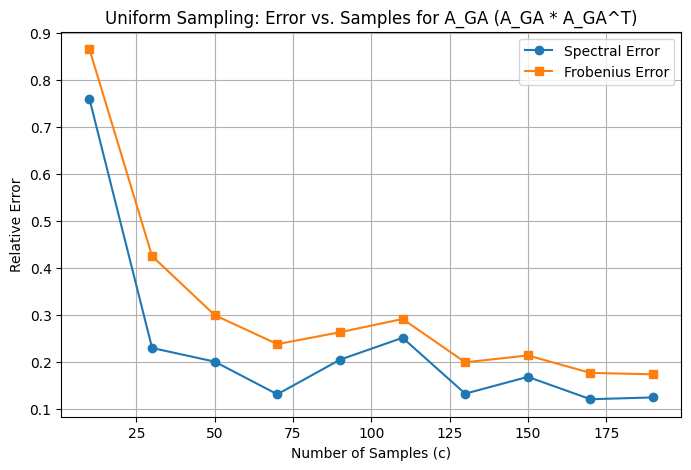

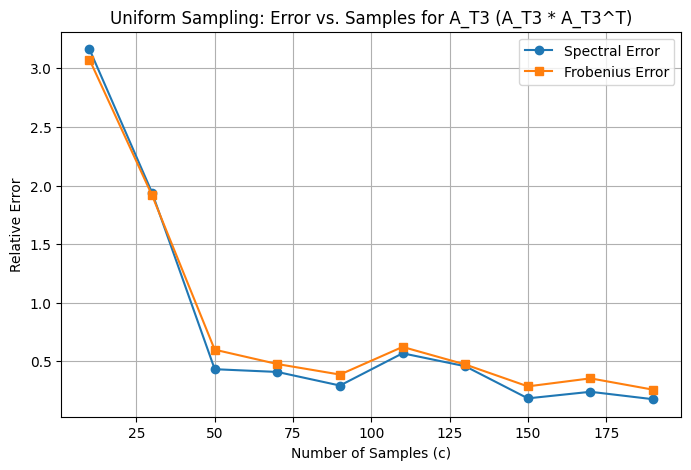

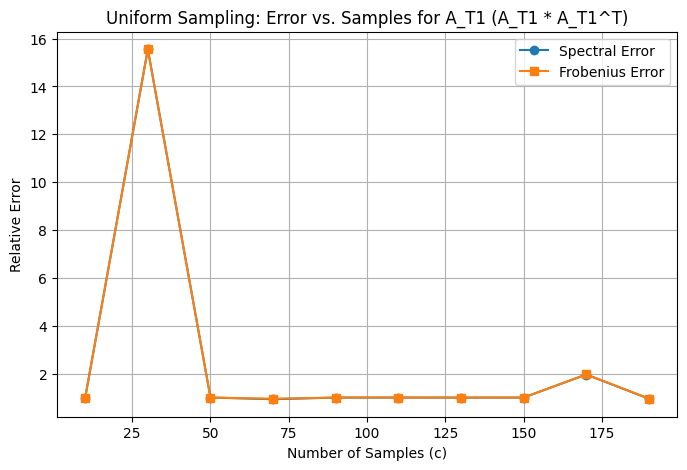

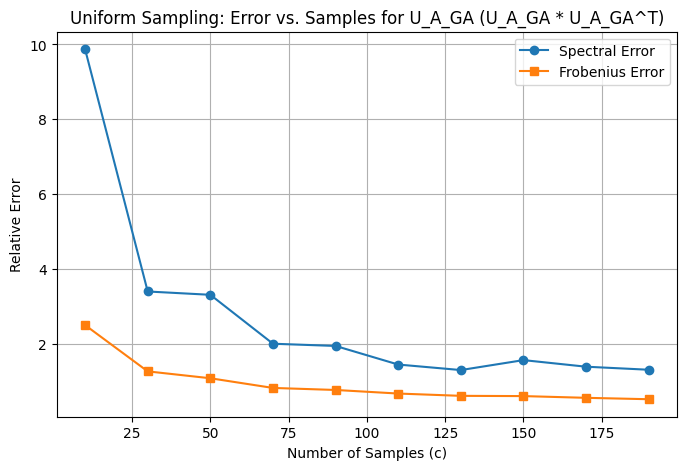

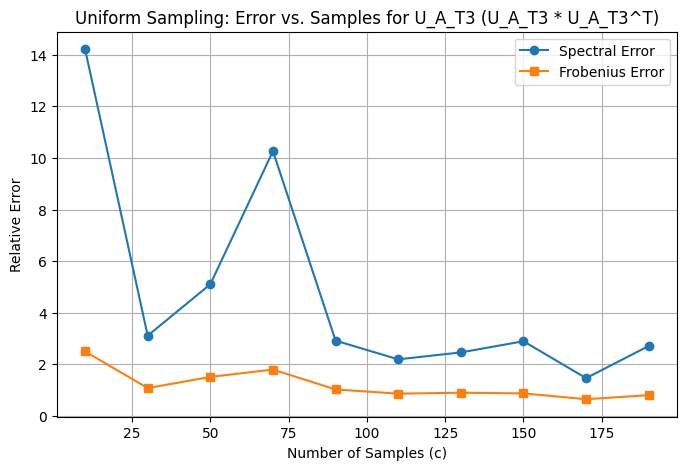

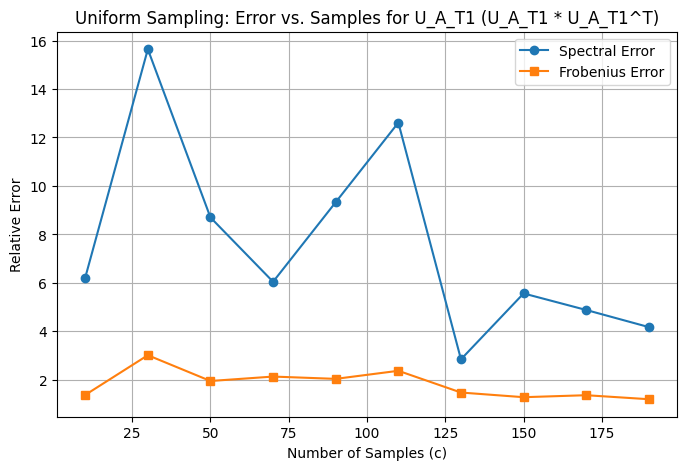

In [ ]:
c_values = np.arange(10, 210, 20)  # e.g., 10, 30, 50, ..., 190

#############################
# Approximation for A_GA:
#############################
# Uniform probabilities for approximating A_GA*A_GA^T.
A_GA_p_uniform = compute_sampling_probabilities(A_GA.T, A_GA, method="uniform")
spec_err_A_GA_uniform, fro_err_A_GA_uniform = compute_sample_approximation_errors(A_GA, A_GA_p_uniform, c_values)
plot_errors(c_values, spec_err_A_GA_uniform, fro_err_A_GA_uniform,
            "Uniform Sampling: Error vs. Samples for A_GA (A_GA * A_GA^T)")

#############################
# Approximation for A_T3:
#############################
A_T3_p_uniform = compute_sampling_probabilities(A_T3.T, A_T3, method="uniform")
spec_err_A_T3_uniform, fro_err_A_T3_uniform = compute_sample_approximation_errors(A_T3, A_T3_p_uniform, c_values)
plot_errors(c_values, spec_err_A_T3_uniform, fro_err_A_T3_uniform,
            "Uniform Sampling: Error vs. Samples for A_T3 (A_T3 * A_T3^T)")

#############################
# Approximation for A_T1:
#############################
A_T1_p_uniform = compute_sampling_probabilities(A_T1.T, A_T1, method="uniform")
spec_err_A_T1_uniform, fro_err_A_T1_uniform = compute_sample_approximation_errors(A_T1, A_T1_p_uniform, c_values)
plot_errors(c_values, spec_err_A_T1_uniform, fro_err_A_T1_uniform,
            "Uniform Sampling: Error vs. Samples for A_T1 (A_T1 * A_T1^T)")

#############################
# Approximation for U_A_GA:
#############################
U_A_GA_p_uniform = compute_sampling_probabilities(U_A_GA.T, U_A_GA, method="uniform")
spec_err_U_A_GA_uniform, fro_err_U_A_GA_uniform = compute_sample_approximation_errors(U_A_GA, U_A_GA_p_uniform, c_values)
plot_errors(c_values, spec_err_U_A_GA_uniform, fro_err_U_A_GA_uniform,
            "Uniform Sampling: Error vs. Samples for U_A_GA (U_A_GA * U_A_GA^T)")

#############################
# Approximation for U_A_T3:
#############################
U_A_T3_p_uniform = compute_sampling_probabilities(U_A_T3.T, U_A_T3, method="uniform")
spec_err_U_A_T3_uniform, fro_err_U_A_T3_uniform = compute_sample_approximation_errors(U_A_T3, U_A_T3_p_uniform, c_values)
plot_errors(c_values, spec_err_U_A_T3_uniform, fro_err_U_A_T3_uniform,
            "Uniform Sampling: Error vs. Samples for U_A_T3 (U_A_T3 * U_A_T3^T)")

#############################
# Approximation for U_A_T1:
#############################
U_A_T1_p_uniform = compute_sampling_probabilities(U_A_T1.T, U_A_T1, method="uniform")
spec_err_U_A_T1_uniform, fro_err_U_A_T1_uniform = compute_sample_approximation_errors(U_A_T1, U_A_T1_p_uniform, c_values)
plot_errors(c_values, spec_err_U_A_T1_uniform, fro_err_U_A_T1_uniform,
            "Uniform Sampling: Error vs. Samples for U_A_T1 (U_A_T1 * U_A_T1^T)")

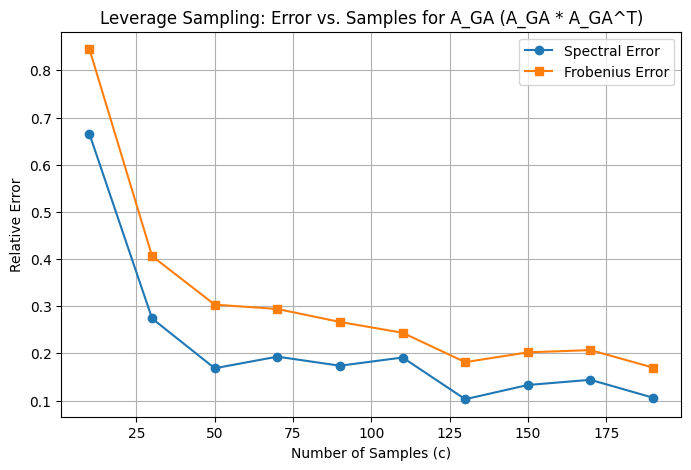

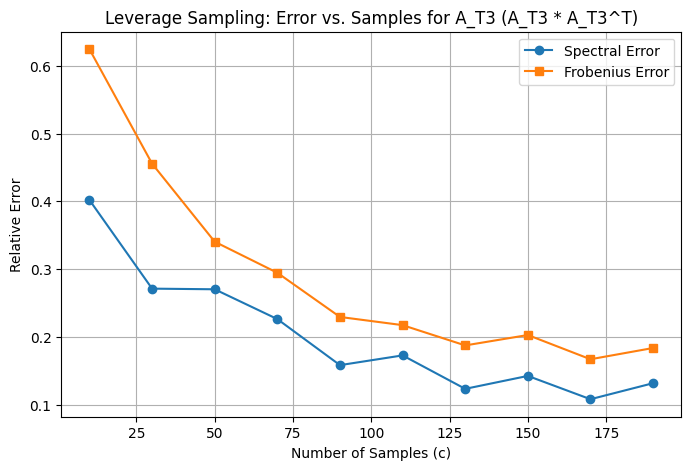

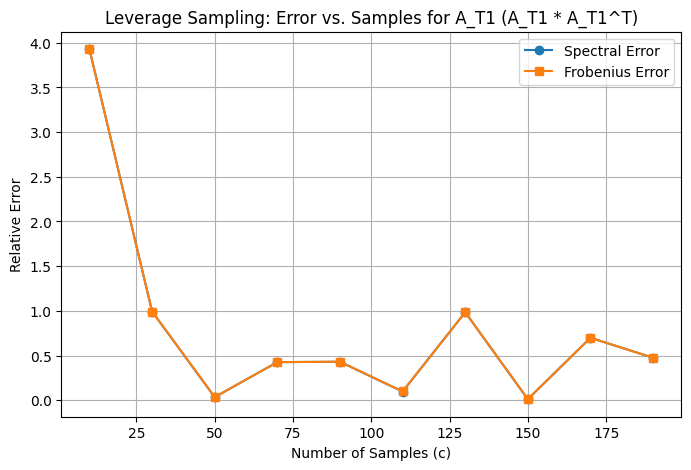

In [ ]:
c_values = list(range(10, 210, 20)) 

A_GA_p_leverage = compute_sampling_probabilities(A_GA.T, A_GA, method="leverage")
spec_err_A_GA_leverage, fro_err_A_GA_leverage = compute_sample_approximation_errors(A_GA, A_GA_p_leverage, c_values)
plot_errors(c_values, spec_err_A_GA_leverage, fro_err_A_GA_leverage,
            "Leverage Sampling: Error vs. Samples for A_GA (A_GA * A_GA^T)")

#############################
# Approximation for A_T3:
#############################
A_T3_p_leverage = compute_sampling_probabilities(A_T3.T, A_T3, method="leverage")
spec_err_A_T3_leverage, fro_err_A_T3_leverage = compute_sample_approximation_errors(A_T3, A_T3_p_leverage, c_values)
plot_errors(c_values, spec_err_A_T3_leverage, fro_err_A_T3_leverage,
            "Leverage Sampling: Error vs. Samples for A_T3 (A_T3 * A_T3^T)")

#############################
# Approximation for A_T1:
#############################
A_T1_p_leverage = compute_sampling_probabilities(A_T1.T, A_T1, method="leverage")
spec_err_A_T1_leverage, fro_err_A_T1_leverage = compute_sample_approximation_errors(A_T1, A_T1_p_leverage, c_values)
plot_errors(c_values, spec_err_A_T1_leverage, fro_err_A_T1_leverage,
            "Leverage Sampling: Error vs. Samples for A_T1 (A_T1 * A_T1^T)")

In [ ]:
P_gaussian = generate_random_projection_matrix(n, d, method="gaussian")
P_sign = generate_random_projection_matrix(n, d, method="sign")